In [1]:
import pandas as pd
import warnings

data = pd.read_csv('arima_data.csv',names=['day','price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
data['day'] = pd.to_datetime(data['day'], format='%Y-%m-%d')
data.set_index('day',inplace=True)
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


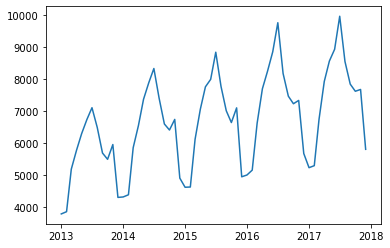

In [5]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['price'])

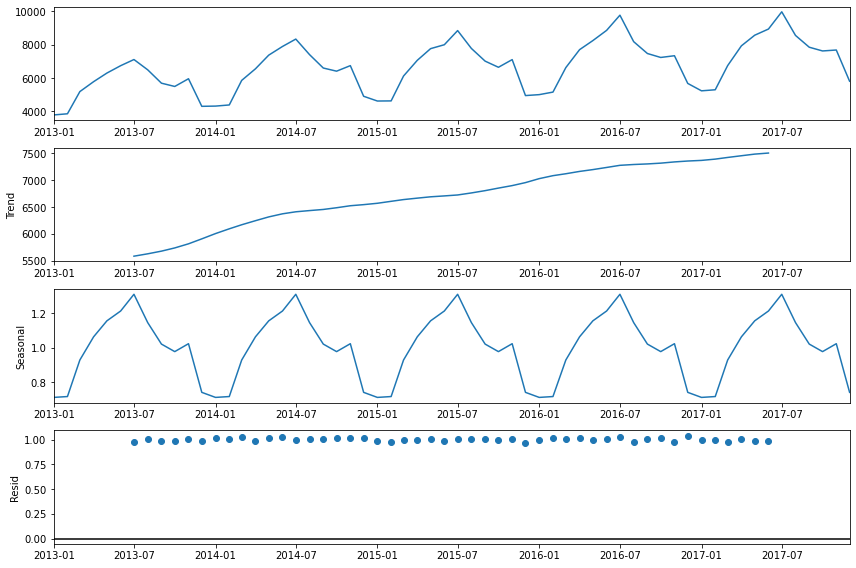

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

training = data[:'2016-12-01']
test = data.drop(training.index)

adf = adfuller(training, regression='ct')
print('ADF Statistic : {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic : -1.9997199341328131
p-value : 0.6015863303793997


<AxesSubplot:xlabel='day'>

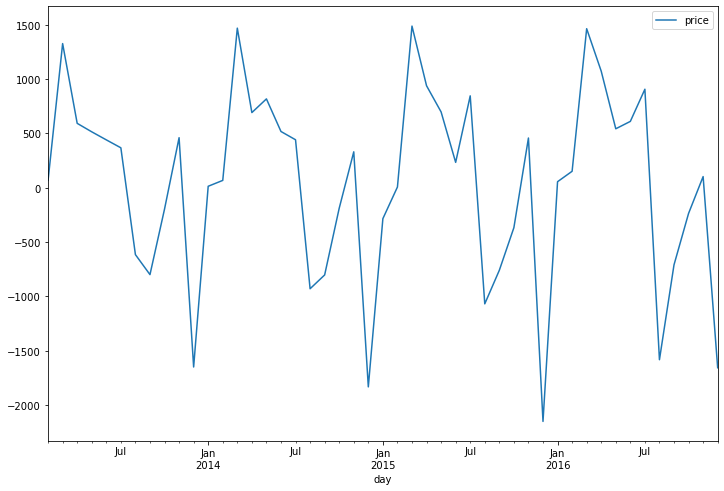

In [14]:
#데이터가 정상성을 갖지 않기 때문에 1차 차분을 통해 정상시계열로 변환
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [15]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -12.094547576926411
p-value : 2.0851606399612174e-22


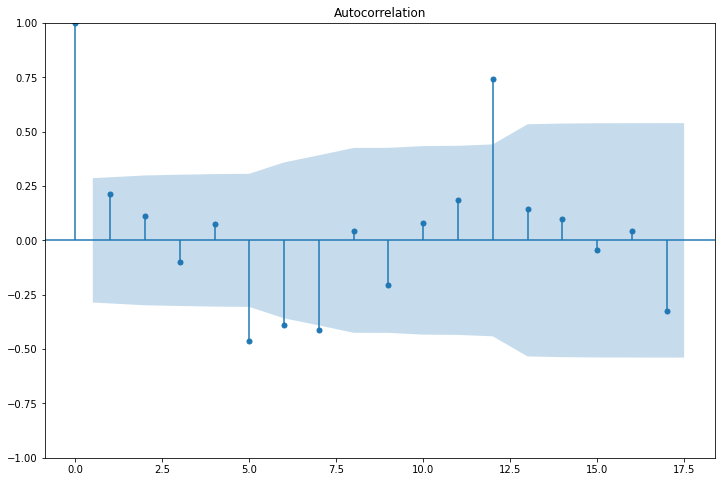

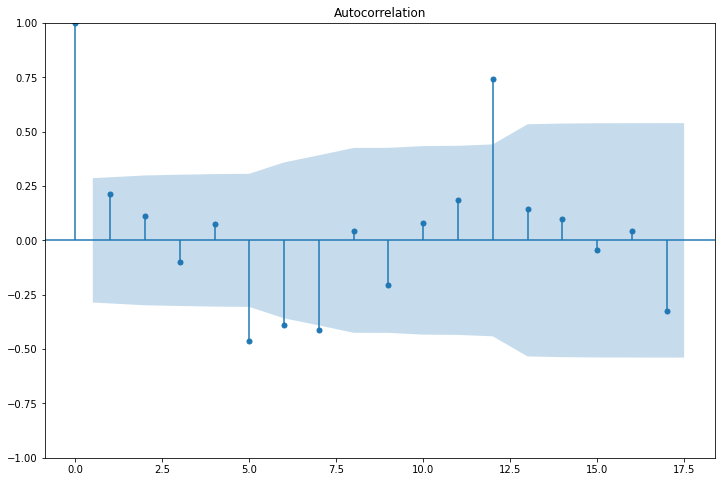

In [16]:
#AR모형의 p값 찾기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data) #AR(p)의 값 확인 가능

c:\Users\suhye\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


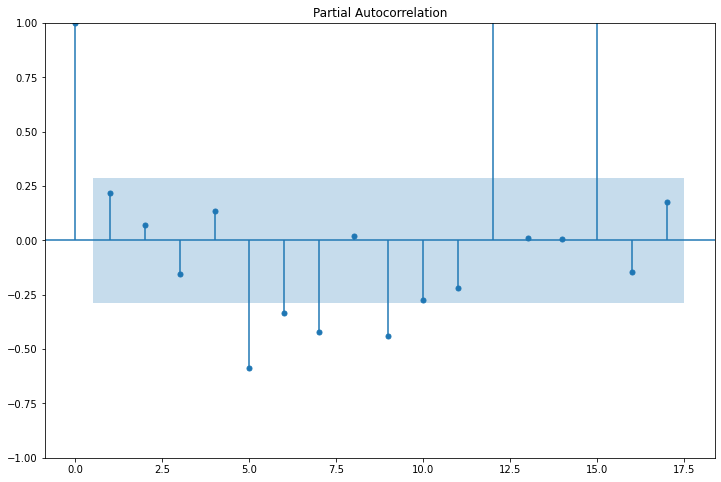

In [17]:
#AR모형의 q값 찾기
plot_pacf(diff_data) #MA(q)의 값 확인 가능

plt.show()

In [18]:
#ARIMA 적용
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2,1,2),trend='ct')
res = model.fit()
res.summary()

c:\Users\suhye\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: In models with integration (`d > 0`) or seasonal integration (`D > 0`), trend terms of lower order than `d + D` cannot be (as they would be eliminated due to the differencing operation). For example, a constant cannot be included in an ARIMA(1, 1, 1) model, but including a linear trend, which would have the same effect as fitting a constant to the differenced data, is allowed.